In [3]:
import torch
import numpy as np
import time
 
device ='cuda' if torch.cuda.is_available  else 'cpu'
print(device)

cuda


In [3]:
len(u)

427

In [4]:
import tensorflow as tf
import os

In [9]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [10]:
gpus

[]

In [1]:
import cv2
import imghdr

C:\Users\Sufiyan\AppData\Local\Temp\ipykernel_16500\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
data_dir = 'Datasets' 

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory('Datasets')

Found 355 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

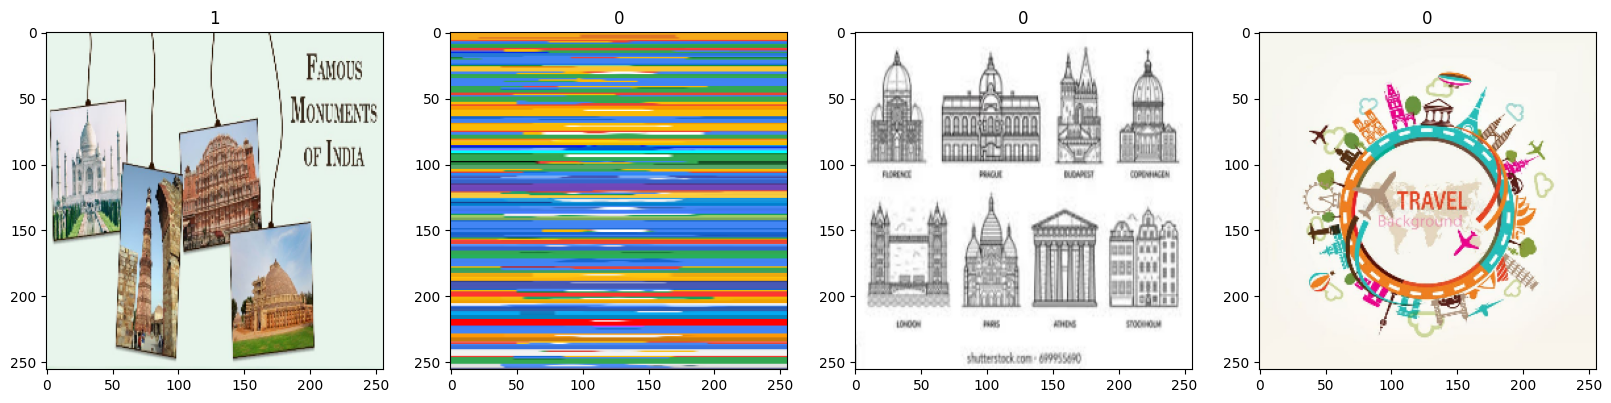

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


In [ ]:
#scale data

In [17]:
data = data.map(lambda x,y: (x/255, y))

In [18]:
data.as_numpy_iterator().next()

(array([[[[0.5438419 , 0.6575674 , 0.83011645],
          [0.5291467 , 0.64287215, 0.81542116],
          [0.5464001 , 0.6601256 , 0.8326746 ],
          ...,
          [0.39198837, 0.5986366 , 0.88082105],
          [0.38063258, 0.5923973 , 0.8669071 ],
          [0.38431373, 0.59607846, 0.87058824]],
 
         [[0.5411765 , 0.654902  , 0.8199142 ],
          [0.53003854, 0.643764  , 0.8102189 ],
          [0.5450448 , 0.65877026, 0.8313193 ],
          ...,
          [0.39084017, 0.59748846, 0.8796729 ],
          [0.38491115, 0.5966759 , 0.87118566],
          [0.38431373, 0.59607846, 0.87058824]],
 
         [[0.54615504, 0.6598805 , 0.8245864 ],
          [0.5411152 , 0.6548407 , 0.8210478 ],
          [0.54901963, 0.6627451 , 0.8352941 ],
          ...,
          [0.392977  , 0.5988051 , 0.8809896 ],
          [0.38933092, 0.5987366 , 0.8732464 ],
          [0.39017323, 0.59957886, 0.87408864]],
 
         ...,
 
         [[0.43207672, 0.46580833, 0.50422746],
          [0.39244

In [ ]:
#split data

In [19]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [20]:
train_size

8

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
#deep learning model

In [22]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [ ]:
#Train

In [28]:
logdir='logs'

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


8/8 [==============================] - 6s 440ms/step - loss: 1.2311 - accuracy: 0.5820 - val_loss: 0.8130 - val_accuracy: 0.6719
Epoch 2/20
8/8 [==============================] - 4s 422ms/step - loss: 0.6822 - accuracy: 0.6758 - val_loss: 0.6319 - val_accuracy: 0.6406
Epoch 3/20
8/8 [==============================] - 4s 454ms/step - loss: 0.6163 - accuracy: 0.6797 - val_loss: 0.5509 - val_accuracy: 0.7031
Epoch 4/20
8/8 [==============================] - 4s 431ms/step - loss: 0.5492 - accuracy: 0.7188 - val_loss: 0.5420 - val_accuracy: 0.7188
Epoch 5/20
8/8 [==============================] - 4s 429ms/step - loss: 0.5837 - accuracy: 0.7109 - val_loss: 0.4985 - val_accuracy: 0.7344
Epoch 6/20
8/8 [==============================] - 4s 433ms/step - loss: 0.5406 - accuracy: 0.7305 - val_loss: 0.5148 - val_accuracy: 0.8125
Epoch 7/20
8/8 [==============================] - 4s 416ms/step - loss: 0.4712 - accuracy: 0.7969 - val_loss: 0.3261 - val_accuracy: 0.8438
Epoch 8/20
8/8 [==

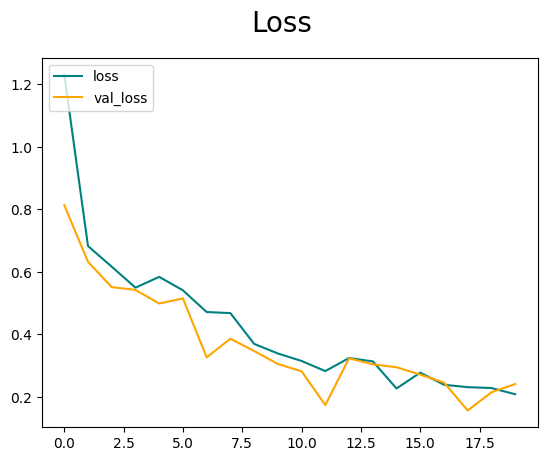

In [31]:
#plotting
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

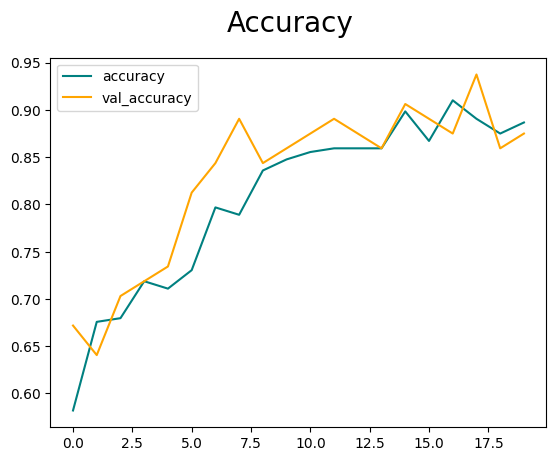

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [33]:
#evaluate
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
print(pre.result(), re.result(), acc.result())

1/1 [==============================] - 0s 167ms/step
tf.Tensor(0.84615386, shape=(), dtype=float32) tf.Tensor(0.9166667, shape=(), dtype=float32) tf.Tensor(0.90625, shape=(), dtype=float32)


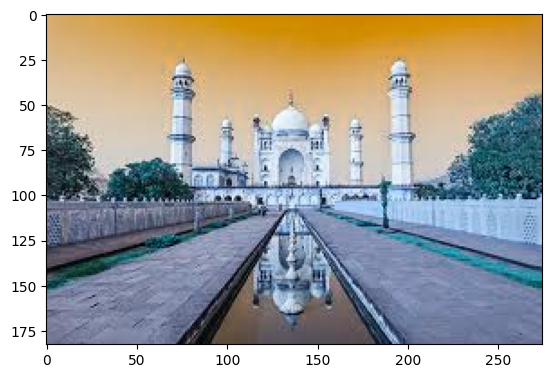

In [59]:
#testing
import cv2
img = cv2.imread('gig.jpeg')
plt.imshow(img)
plt.show()

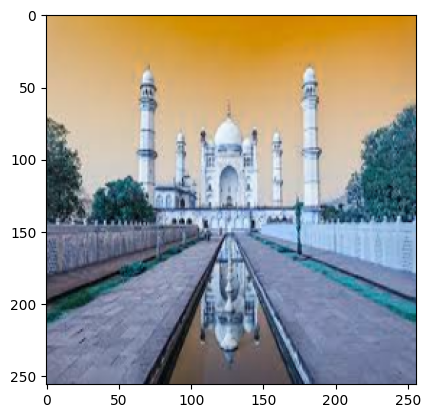

In [60]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [61]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 36ms/step


array([[0.01790487]], dtype=float32)

In [62]:
if yhat > 0.5: 
    print(f' Identified class of monument:European')
else:
    print(f'Identified class of monument:indian ')

Identified class of monument:indian 


In [44]:
from tensorflow.keras.models import load_model


In [45]:
model.save(os.path.join('models','monumentclassifier.h5'))

In [51]:
new_model = load_model('models/monumentclassifier.h5')

In [52]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 103ms/step


array([[0.14241491]], dtype=float32)